In [1]:
import numpy as np 
import pandas as pd 
import scipy
import matplotlib.pyplot as plt
from numpy import array
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
import math

# Collect Data

In [5]:
df = pd.read_csv("../datasets/Stocks/aapl.us.txt", sep=',')
df = df[df['Date'] > '1990-01-01']
df

,Date,Open,High,Low,Close,Volume,OpenInt
1344,1990-01-02,1.1283,1.2013,1.1206,1.1921,51090928,0
1345,1990-01-03,1.2167,1.2167,1.2013,1.2013,58006332,0
1346,1990-01-04,1.2241,1.2407,1.1921,1.2037,61776401,0
1347,1990-01-05,1.2089,1.2241,1.1845,1.2089,34389635,0
1348,1990-01-08,1.2013,1.2167,1.1845,1.2167,28326921,0
...,...,...,...,...,...,...,...
8359,2017-11-06,171.7500,174.3600,171.1000,173.6300,34901241,0
8360,2017-11-07,173.2900,174.5100,173.2900,174.1800,24424877,0
8361,2017-11-08,174.0300,175.6100,173.7100,175.6100,24451166,0
8362,2017-11-09,174.4800,175.4600,172.5200,175.2500,29533086,0


In [6]:
df_close = df.reset_index()['Close']
df_close.head()

0    1.1921
1    1.2013
2    1.2037
3    1.2089
4    1.2167
Name: Close, dtype: float64

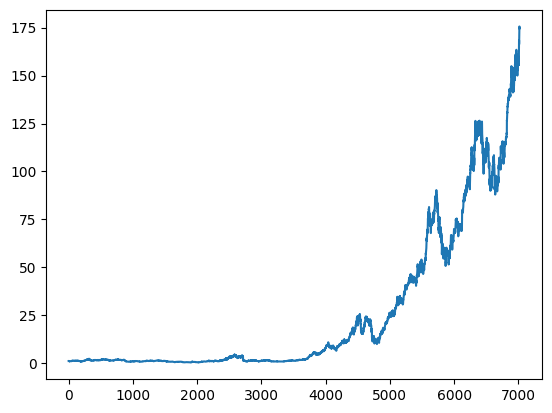

In [7]:
plt.plot(df_close)
plt.show()

In [9]:
scaler = MinMaxScaler(feature_range=(0,1))
df_close = scaler.fit_transform(np.array(df_close).reshape(-1, 1))
print(df_close)

[[0.00444324]
 [0.00449576]
 [0.00450945]
 ...
 [1.        ]
 [0.99794516]
 [0.99463459]]


# Preprocessing Data with Train and Test

In [10]:
train_dataset_size = int(len(df_close) * 0.70)
test_dataset_size = int(len(df_close) - train_dataset_size)
train_data, test_data = df_close[0:train_dataset_size], df_close[train_dataset_size: len(df_close)]

In [13]:
len(train_data)

4914

In [14]:
len(test_data)

2106

In [15]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step -1 ):
        a = dataset[i: (i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[ i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [16]:
time_step = 100
X_train, Y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)

In [17]:
display(X_train.shape)
display(Y_train.shape)

display(x_test.shape)
display(y_test.shape)

(4813, 100)

(4813,)

(2005, 100)

(2005,)

# Create LSTM Model

In [19]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

display(X_train)
display(x_test)

array([[[0.00444324],
        [0.00449576],
        [0.00450945],
        ...,
        [0.00486106],
        [0.00520467],
        [0.00531427]],

       [[0.00449576],
        [0.00450945],
        [0.00453914],
        ...,
        [0.00520467],
        [0.00531427],
        [0.00531427]],

       [[0.00450945],
        [0.00453914],
        [0.00458366],
        ...,
        [0.00531427],
        [0.00531427],
        [0.00494953]],

       ...,

       [[0.0660193 ],
        [0.06815976],
        [0.07052853],
        ...,
        [0.09720146],
        [0.09987275],
        [0.10175635]],

       [[0.06815976],
        [0.07052853],
        [0.07256624],
        ...,
        [0.09987275],
        [0.10175635],
        [0.10140246]],

       [[0.07052853],
        [0.07256624],
        [0.06915864],
        ...,
        [0.10175635],
        [0.10140246],
        [0.10175064]]])

array([[[0.09894807],
        [0.09662496],
        [0.09794348],
        ...,
        [0.14420016],
        [0.14376636],
        [0.14812147]],

       [[0.09662496],
        [0.09794348],
        [0.0973042 ],
        ...,
        [0.14376636],
        [0.14812147],
        [0.14707122]],

       [[0.09794348],
        [0.0973042 ],
        [0.09887958],
        ...,
        [0.14812147],
        [0.14707122],
        [0.14689428]],

       ...,

       [[0.80359179],
        [0.82670871],
        [0.81911723],
        ...,
        [0.95376616],
        [0.9787096 ],
        [0.98869839]],

       [[0.82670871],
        [0.81911723],
        [0.824026  ],
        ...,
        [0.9787096 ],
        [0.98869839],
        [0.99183773]],

       [[0.81911723],
        [0.824026  ],
        [0.82265611],
        ...,
        [0.98869839],
        [0.99183773],
        [1.        ]]])

In [20]:
display(X_train.shape)
display(x_test.shape)

(4813, 100, 1)

(2005, 100, 1)

In [60]:
import tensorflow as tf

In [62]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100, 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(tf.keras.layers.Dropout(0.1))
model.add(Dense(1))
model.compile(loss="mean_squared_error", optimizer="adam")

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_7 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_8 (LSTM)               (None, 50)                20200     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [63]:
model.fit(X_train, Y_train, 
          validation_data=(x_test, y_test), 
          epochs=20,
          batch_size=64,
          verbose=1,
          )

Epoch 1/20


76/76 [==============================] - 59s 359ms/step - loss: 1.2297e-04 - val_loss: 0.0021
Epoch 2/20
76/76 [==============================] - 23s 299ms/step - loss: 1.7242e-05 - val_loss: 0.0045
Epoch 3/20
76/76 [==============================] - 24s 319ms/step - loss: 1.8290e-05 - val_loss: 0.0043
Epoch 4/20
76/76 [==============================] - 24s 310ms/step - loss: 1.5182e-05 - val_loss: 0.0033
Epoch 5/20
76/76 [==============================] - 27s 357ms/step - loss: 1.4773e-05 - val_loss: 0.0064
Epoch 6/20
76/76 [==============================] - 27s 353ms/step - loss: 1.4989e-05 - val_loss: 0.0035
Epoch 7/20
76/76 [==============================] - 23s 302ms/step - loss: 1.8120e-05 - val_loss: 0.0042
Epoch 8/20
76/76 [==============================] - 23s 302ms/step - loss: 1.2740e-05 - val_loss: 0.0025
Epoch 9/20
76/76 [==============================] - 23s 307ms/step - loss: 1.1212e-05 - val_loss: 0.0024
Epoch 10/20
76/76 [==============================] - 23s 303ms/ste

In [23]:
import tensorflow as tf
tf.__version__

'2.12.0'

In [64]:
train_pred = model.predict(X_train)
test_pred = model.predict(x_test)

train_predict = scaler.inverse_transform(train_pred)
test_predict = scaler.inverse_transform(test_pred)

63/63 [==============================] - 5s 79ms/step


# Predict the test data

In [65]:
math.sqrt(mean_squared_error(Y_train, train_predict))

6.962810683362053

In [66]:
math.sqrt(mean_squared_error(y_test, test_predict))

81.96053455113069

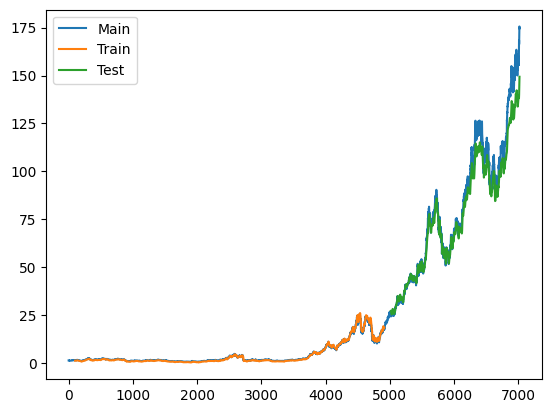

In [67]:
look_back = 100
train_predict_plot = np.empty_like(df_close)
train_predict_plot[:, :] = np.nan
train_predict_plot[look_back: len(train_predict)+look_back, :] = train_predict

test_predict_plot = np.empty_like(df_close)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict)+ (look_back*2)+1 : len(df_close)-1, :] = test_predict

plt.plot(scaler.inverse_transform(df_close), label="Main")
plt.plot(train_predict_plot, label="Train")
plt.plot(test_predict_plot, label="Test")
plt.legend()
plt.show()

# Predict the future 90 days and plot output

In [28]:
len(test_data)

2106

In [68]:
x_input = test_data[len(test_data)-100 : ].reshape(1, -1)
x_input.shape

(1, 100)

In [69]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()
temp_input

[0.8226561125649084,
 0.8263662357330066,
 0.8237406101063526,
 0.8119252947864093,
 0.8237976889243234,
 0.8116399006965557,
 0.8135805805075607,
 0.8106124819730822,
 0.813980132233356,
 0.8062174129893351,
 0.8144938415950926,
 0.8194026199405763,
 0.8220853243852011,
 0.8232839795625867,
 0.8347568219747056,
 0.8420058318569896,
 0.8449168515734974,
 0.8478278712900051,
 0.8531932801792548,
 0.8493119205572445,
 0.8489123688314492,
 0.8593007137021241,
 0.8629537580522514,
 0.8670063541281741,
 0.8505676545526007,
 0.8446314574836437,
 0.8402363884998967,
 0.8476566348360929,
 0.8878972015054651,
 0.8789358270840589,
 0.8836162901576596,
 0.8973152064706374,
 0.9045071375349507,
 0.9101008616960834,
 0.8809906645310055,
 0.8933196892126855,
 0.9067902902537803,
 0.9167220045806893,
 0.913011881412591,
 0.8954316054776029,
 0.893433846848627,
 0.8917785611274756,
 0.9063907385279852,
 0.9075323148873999,
 0.9034797188114773,
 0.906847369071751,
 0.9159799799470695,
 0.92419932973485

In [74]:
lst_output = []
n_steps = 100
i =0

while(i<30):
    if(len(temp_input)>100):
        #print(temp_input)
        x_input = np.array(temp_input[1:])
        print(f"{i} day input {x_input}")
        x_input = x_input.reshape(1, -1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print(f"{i} day output {yhat}")
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        lst_output.extend(yhat.tolist())
        i = i+1
    
    else:
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i = i+1

0 day input [0.32402483 0.32310742 0.32221252 0.32133931 0.32048708 0.31965527
 0.31884307 0.31805003 0.31727546 0.31651887 0.31577969 0.3150574
 0.31435147 0.31366158 0.31298697 0.31232753 0.31168273 0.31105217
 0.31043532 0.30983207 0.30924183 0.30866444 0.30809939 0.3075465
 0.30700549 0.30647585 0.30595741 0.30545002 0.30495319 0.30446678
 0.30399051 0.3035242  0.30306748 0.30262023 0.30218208 0.30175295
 0.30133262 0.30092081 0.30051735 0.30012208 0.29973477 0.29935527
 0.29898334 0.29861885 0.29826158 0.29791149 0.29756826 0.29723188
 0.29690212 0.29657879 0.29626179 0.29595107 0.29564634 0.29534754
 0.29505458 0.2947672  0.29448548 0.29420906 0.29393804 0.29367217
 0.2934114  0.29315561 0.29290465 0.29265851 0.29241705 0.29218006
 0.29194754 0.29171956 0.29149574 0.29127613 0.29106066 0.29084927
 0.29064173 0.29043803 0.29023826 0.29004213 0.28984967 0.28966069
 0.28947529 0.28929326 0.28911456 0.28893918 0.28876704 0.28859806
 0.28843209 0.28826922 0.2881093  0.28795233 0.28779

In [75]:
day_new = np.arange(1, 101)
day_pred = np.arange(101, 131)

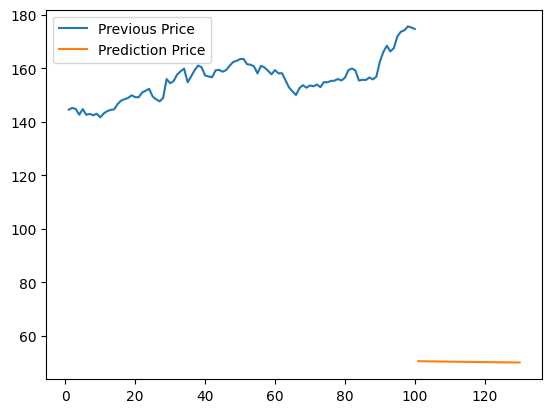

In [76]:
plt.plot(day_new, scaler.inverse_transform(df_close[len(df_close)-100 : ]), label="Previous Price")
plt.plot(day_pred, scaler.inverse_transform(lst_output), label="Prediction Price")
plt.legend(loc="upper left")
plt.show()